<a href="https://colab.research.google.com/github/MathewLipman/Work-Samples/blob/main/Bike_Share_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
bike_sharing = pd.read_csv('/content/drive/MyDrive/Dataset/202207-capitalbikeshare-tripdata.csv')

In [ ]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393683 entries, 0 to 393682
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             393683 non-null  object 
 1   rideable_type       393683 non-null  object 
 2   started_at          393683 non-null  object 
 3   ended_at            393683 non-null  object 
 4   start_station_name  378890 non-null  object 
 5   start_station_id    378890 non-null  float64
 6   end_station_name    376587 non-null  object 
 7   end_station_id      376587 non-null  float64
 8   start_lat           393683 non-null  float64
 9   start_lng           393683 non-null  float64
 10  end_lat             392843 non-null  float64
 11  end_lng             392843 non-null  float64
 12  member_casual       393683 non-null  object 
dtypes: float64(6), object(7)
memory usage: 39.0+ MB


In [ ]:
bike_sharing.copy() 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,023A22990112155D,classic_bike,2022-07-29 18:44:37,2022-07-29 18:57:09,Fairfax Dr & N Randolph St,31034.0,Clarendon Blvd & Pierce St,31016.0,38.882629,-77.109366,38.893438,-77.076389,member
1,AB7451BFA95ADC66,classic_bike,2022-07-22 18:18:54,2022-07-22 18:24:36,Fern St & Army Navy Dr,31936.0,Crystal City Metro / 18th St & S Bell St,31007.0,38.864838,-77.056873,38.857785,-77.051698,member
2,F3301E3CA0A6F6EA,classic_bike,2022-07-23 13:40:54,2022-07-23 13:41:03,2nd & G St NE,31639.0,2nd & G St NE,31639.0,38.899670,-77.003666,38.899670,-77.003666,member
3,245EBE5294DD9136,classic_bike,2022-07-05 16:24:30,2022-07-05 16:24:52,USDA / 12th & C St SW,31217.0,USDA / 12th & C St SW,31217.0,38.886277,-77.028242,38.886277,-77.028242,member
4,4CBA79FC841A54D0,classic_bike,2022-07-02 15:16:50,2022-07-02 16:36:47,Harvard St & Adams Mill Rd NW,31112.0,Harvard St & Adams Mill Rd NW,31112.0,38.927872,-77.043358,38.927872,-77.043358,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393678,2DB23364D09F2EFC,classic_bike,2022-07-19 18:45:14,2022-07-19 19:05:37,Van Ness Metro / UDC,31300.0,14th & Otis Pl NW,31131.0,38.944551,-77.063896,38.934405,-77.032687,casual
393679,C117D2072E4BF78D,classic_bike,2022-07-15 09:38:25,2022-07-15 09:49:20,13th & D St NE,31622.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.894832,-76.987633,38.884095,-76.995234,member
393680,4BB4E1BBDB329388,classic_bike,2022-07-03 19:32:50,2022-07-03 19:38:36,Lincoln Park / 13th & East Capitol St NE,31619.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.890461,-76.988355,38.884095,-76.995234,member
393681,ECD803A443AA4D6D,classic_bike,2022-07-22 21:27:16,2022-07-22 21:35:40,Lincoln Park / 13th & East Capitol St NE,31619.0,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613.0,38.890461,-76.988355,38.884095,-76.995234,member


In [ ]:
bike_sharing["start_station_name"].value_counts(normalize=True)

Lincoln Memorial                                         0.012310
Jefferson Dr & 14th St SW                                0.011755
Smithsonian-National Mall / Jefferson Dr & 12th St SW    0.010029
Columbus Circle / Union Station                          0.009953
New Hampshire Ave & T St NW                              0.009847
                                                           ...   
Frederick Ave & Horners Ln                               0.000011
Medical Center Dr & Key West Ave                         0.000005
Shady Grove Hospital                                     0.000005
Joliet St & MLK Ave SW/Bald Eagle Rec Ctr                0.000003
Green Range Dr and Glade Dr                              0.000003
Name: start_station_name, Length: 685, dtype: float64

In [ ]:
# Convert the data type of the column to a string
bike_sharing["start_station_name"] = bike_sharing["start_station_name"]

# Filter rows where start_station_name is "Lincoln Memorial"
filtered_df = bike_sharing[bike_sharing["start_station_name"] == "Lincoln Memorial"]

# Get value counts of end_station_name column for the filtered rows
counts = filtered_df["end_station_name"].value_counts(normalize=True)

print(counts)


Lincoln Memorial                                         0.084996
Jefferson Memorial                                       0.067866
Jefferson Dr & 14th St SW                                0.065048
Smithsonian-National Mall / Jefferson Dr & 12th St SW    0.056375
17th St & Independence Ave SW                            0.034258
                                                           ...   
Calvert St & Woodley Pl NW                               0.000217
Clarendon Metro / Wilson Blvd & N Highland St            0.000217
22nd & P ST NW                                           0.000217
Reservoir Rd & 38th St NW                                0.000217
Hamlin & 7th St NE                                       0.000217
Name: end_station_name, Length: 249, dtype: float64


Notice we took the most popular starting station and compwe cross referenced the most popular ending stations with the starting station. The results show a round trip accounts for nearly 8.5%% of the trips for Lincoln Memorial. This makes sense because this is bike data and people using a bike for fitness or to run errands are likely to then drop it off again near where they began. 

In [ ]:
myf = bike_sharing["start_station_name"][bike_sharing["start_station_name"] == "Lincoln Memorial"]

In [ ]:
bike_sharing["start_station_name"] = bike_sharing["start_station_name"]
myf = bike_sharing[bike_sharing["start_station_name"] == "Lincoln Memorial"] 
counts = myf["end_station_name"].value_counts(normalize=False)
print(counts)



Lincoln Memorial                                         392
Jefferson Memorial                                       313
Jefferson Dr & 14th St SW                                300
Smithsonian-National Mall / Jefferson Dr & 12th St SW    260
17th St & Independence Ave SW                            158
                                                        ... 
Calvert St & Woodley Pl NW                                 1
Clarendon Metro / Wilson Blvd & N Highland St              1
22nd & P ST NW                                             1
Reservoir Rd & 38th St NW                                  1
Hamlin & 7th St NE                                         1
Name: end_station_name, Length: 249, dtype: int64


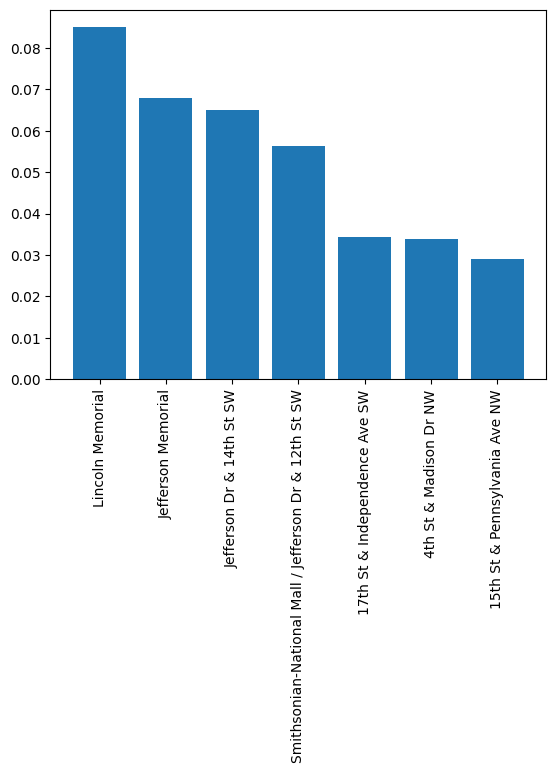

In [ ]:
import matplotlib.pyplot as plt

bike_sharing["start_station_name"] = bike_sharing["start_station_name"]
myf = bike_sharing[bike_sharing["start_station_name"] == "Lincoln Memorial"]
counts = myf["end_station_name"].value_counts(normalize=True)

# Get the top n values
top_counts = counts.nlargest(7)

plt.bar(top_counts.index, top_counts)
plt.xticks(rotation=90)
plt.show()


In [ ]:
print(bike_sharing[["started_at", "ended_at"]])

                 started_at             ended_at
0       2022-07-29 18:44:37  2022-07-29 18:57:09
1       2022-07-22 18:18:54  2022-07-22 18:24:36
2       2022-07-23 13:40:54  2022-07-23 13:41:03
3       2022-07-05 16:24:30  2022-07-05 16:24:52
4       2022-07-02 15:16:50  2022-07-02 16:36:47
...                     ...                  ...
393678  2022-07-19 18:45:14  2022-07-19 19:05:37
393679  2022-07-15 09:38:25  2022-07-15 09:49:20
393680  2022-07-03 19:32:50  2022-07-03 19:38:36
393681  2022-07-22 21:27:16  2022-07-22 21:35:40
393682  2022-07-28 17:41:30  2022-07-28 18:15:27

[393683 rows x 2 columns]


In [ ]:
dte_col = bike_sharing[["started_at", "ended_at"]]
dte_col_dteclean = pd.to_datetime(dte_col)

ValueError: ignored

In [ ]:
# Select the columns "started_at" and "ended_at"
dte_col = bike_sharing[["started_at", "ended_at"]]

# Convert the columns to datetime format using the specified format
dte_col_dteclean = dte_col.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

# Print the first 5 rows of the cleaned dataframe
print(dte_col_dteclean.head())


In [ ]:
# Select the columns "started_at" and "ended_at"
dte_col = bike_sharing[["started_at", "ended_at"]]

# Convert the columns to datetime format using the specified format
dte_col_dteclean = dte_col.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S'))

# Sort the DataFrame by the "started_at" column
dte_col_dteclean = dte_col_dteclean.sort_values(by=["started_at"])

# Print the first 5 rows of the cleaned dataframe
print(dte_col_dteclean.head())


In [ ]:


# Define the bin edges for each geographic region
nyc_edges = [-74.5, -73.7, 40.5, 41.2]
dc_edges = [-77.2, -76.8, 38.75, 39.1]
sf_edges = [-123.1, -122.3, 37.5, 38.0]

# Create bins for start_lat and start_lng columns based on geographic region
bike_sharing['start_lat_bin'] = pd.cut(bike_sharing['start_lat'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])
bike_sharing['start_lng_bin'] = pd.cut(bike_sharing['start_lng'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])

# Create bins for end_lat and end_lng columns based on geographic region
bike_sharing['end_lat_bin'] = pd.cut(bike_sharing['end_lat'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])
bike_sharing['end_lng_bin'] = pd.cut(bike_sharing['end_lng'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])

# Print the first 5 rows of the updated DataFrame
print(bike_sharing.head())


In [ ]:
bike_sharing["end_lng_bin"].value_counts()

In [ ]:


# Define the bin edges for each geographic region
nyc_edges = [-74.5, -73.7, 40.5, 41.2]
dc_edges = [-77.2, -76.8, 38.75, 39.1]
sf_edges = [-123.1, -122.3, 37.5, 38.0]

# Create bins for start_lat and start_lng columns based on geographic region
bike_sharing['start_lat_bin'] = pd.cut(bike_sharing['start_lat'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])
bike_sharing['start_lng_bin'] = pd.cut(bike_sharing['start_lng'], bins=sf_edges, labels=['SF', 'NYC', 'DC'])

# Create bins for end_lat and end_lng columns based on geographic region
bike_sharing['end_lat_bin'] = pd.cut(bike_sharing['end_lat'], bins=nyc_edges, labels=['NYC', 'DC', 'SF'])
bike_sharing['end_lng_bin'] = pd.cut(bike_sharing['end_lng'], bins=sf_edges, labels=['SF', 'NYC', 'DC'])

# Print the first 5 rows of the updated DataFrame
print(bike_sharing.head())


In [ ]:
 import pandas as pd

# Define the bin edges for each geographic region
nyc_lat_edges = [40.5, 41.2]
nyc_lng_edges = [-74.5, -73.7]
dc_lat_edges = [38.75, 39.1]
dc_lng_edges = [-77.2, -76.8]
sf_lat_edges = [37.5, 38.0]
sf_lng_edges = [-123.1, -122.3]

# Create a function to determine the geographic region based on latitude and longitude
def get_region(lat, lng):
    if nyc_lat_edges[0] <= lat <= nyc_lat_edges[1] and nyc_lng_edges[0] <= lng <= nyc_lng_edges[1]:
        return 'NYC'
    elif dc_lat_edges[0] <= lat <= dc_lat_edges[1] and dc_lng_edges[0] <= lng <= dc_lng_edges[1]:
        return 'DC'
    elif sf_lat_edges[0] <= lat <= sf_lat_edges[1] and sf_lng_edges[0] <= lng <= sf_lng_edges[1]:
        return 'SF'
    else:
        return 'Other'

# Apply the get_region function to the start_lat and start_lng columns
bike_sharing['start_region'] = bike_sharing.apply(lambda row: get_region(row['start_lat'], row['start_lng']), axis=1)

# Apply the get_region function to the end_lat and end_lng columns
bike_sharing['end_region'] = bike_sharing.apply(lambda row: get_region(row['end_lat'], row['end_lng']), axis=1)

# Print the first 5 rows of the updated DataFrame
print(bike_sharing.head())


In [ ]:
print(bike_sharing[['start_lat', 'start_lng']].head())


In [ ]:
import pandas as pd

# Define the bin edges for each geographic region
lat_edges = [37.5, 38.75, 40.5, 41.2]  # Latitude ranges for SF, DC, and NYC
lng_edges = [-123.1, -122.3, -77.2, -76.8, -74.5, -73.7]  # Longitude ranges for SF, DC, and NYC

# Labels for the geographic regions
regions = ['SF', 'DC', 'NYC']
lng_labels = ['SF', 'DC', 'NYC', 'DC', 'SF']

# Function to map longitude values to labels
def map_lng_to_label(lng):
    for i, edge in enumerate(lng_edges[:-1]):
        if lng <= edge:
            return lng_labels[i]
    return lng_labels[-1]

# Create bins for start_lat and start_lng columns based on geographic region
bike_sharing['start_lat_bin'] = pd.cut(bike_sharing['start_lat'], bins=lat_edges, labels=regions)
bike_sharing['start_lng_bin'] = bike_sharing['start_lng'].apply(map_lng_to_label)

# Create bins for end_lat and end_lng columns based on geographic region
bike_sharing['end_lat_bin'] = pd.cut(bike_sharing['end_lat'], bins=lat_edges, labels=regions)
bike_sharing['end_lng_bin'] = bike_sharing['end_lng'].apply(map_lng_to_label)

# Print the first 5 rows of the updated DataFrame
print(bike_sharing["start_lat_bin"].value_counts())


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the distance between two coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# List of popular D.C. areas and their coordinates
dc_areas = {
    'Capitol Hill': (38.8897, -77.0091),
    'Dupont Circle': (38.9096, -77.0434),
    'Georgetown': (38.9091, -77.0654),
    'Foggy Bottom': (38.9007, -77.0502),
    'Adams Morgan': (38.9212, -77.0420),
    'U Street': (38.9171, -77.0280),
    'Chinatown': (38.8988, -77.0219),
    'H Street Corridor': (38.9000, -76.9880),
    'Navy Yard': (38.8765, -77.0061),
    'Columbia Heights': (38.9281, -77.0324)
}

# Function to find the closest area
def closest_area(lat, lng):
    distances = {area: haversine(lat, lng, coord[0], coord[1]) for area, coord in dc_areas.items()}
    return min(distances, key=distances.get)

# Calculate the closest popular area for the start and end points
bike_sharing['start_area'] = bike_sharing.apply(lambda row: closest_area(row['start_lat'], row['start_lng']), axis=1)
bike_sharing['end_area'] = bike_sharing.apply(lambda row: closest_area(row['end_lat'], row['end_lng']), axis=1)

# Print the first 5 rows of the updated DataFrame
print(bike_sharing.head())


In [ ]:
# Create a smaller subset of the data
subset_size = 1000
bike_sharing_subset = bike_sharing.sample(subset_size, random_state=42)


In [ ]:
# Calculate the closest popular area for the start and end points in the subset
bike_sharing_subset['start_area'] = bike_sharing_subset.apply(lambda row: closest_area(row['start_lat'], row['start_lng']), axis=1)
bike_sharing_subset['end_area'] = bike_sharing_subset.apply(lambda row: closest_area(row['end_lat'], row['end_lng']), axis=1)

# Calculate the frequency of each starting area in the subset
start_area_counts_subset = bike_sharing_subset['start_area'].value_counts()
print("Frequency of Starting Areas (subset):")
print(start_area_counts_subset)

# Calculate the frequency of each ending area in the subset
end_area_counts_subset = bike_sharing_subset['end_area'].value_counts()
print("\nFrequency of Ending Areas (subset):")
print(end_area_counts_subset)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


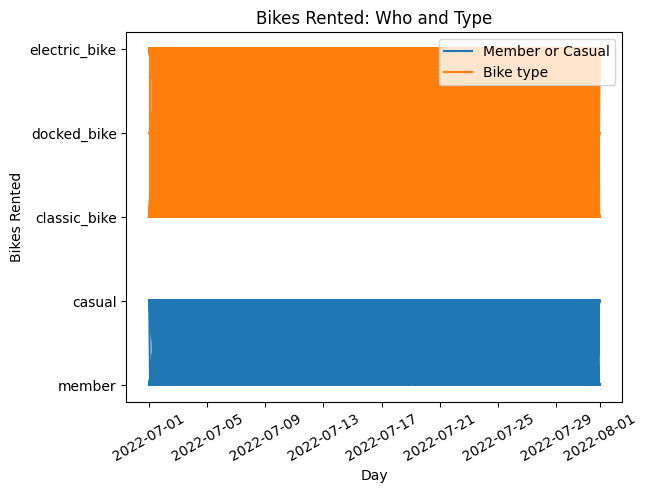

In [ ]:
bike_sharing['started_at'] = pd.to_datetime(bike_sharing['started_at'])

plt.plot(bike_sharing['started_at'], bike_sharing['member_casual'], label='Member or Casual')
plt.plot(bike_sharing['started_at'], bike_sharing['rideable_type'], label='Bike type')
plt.xticks(rotation=30)
plt.xlabel('Day')
plt.ylabel('Bikes Rented')
plt.title("Bikes Rented: Who and Type")
plt.legend()
plt.show()
        


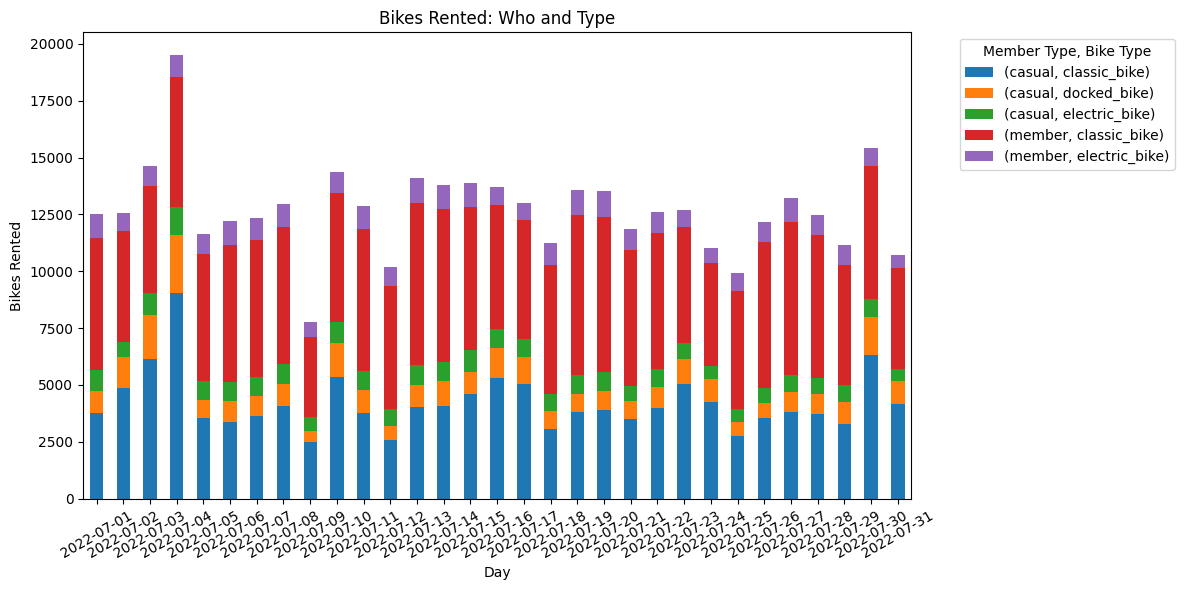

In [ ]:


# Convert 'started_at' to datetime format
bike_sharing['started_at'] = pd.to_datetime(bike_sharing['started_at'])

# Create a summary DataFrame that aggregates bike rentals by date, member type, and rideable type
summary_df = bike_sharing.groupby([bike_sharing['started_at'].dt.date, 'member_casual', 'rideable_type']).size().reset_index(name='count')

# Pivot the summary DataFrame to create a multi-level column index for easy plotting
pivot_df = summary_df.pivot_table(index='started_at', columns=['member_casual', 'rideable_type'], values='count').fillna(0)

# Plot the aggregated data using a bar plot
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xticks(rotation=30)
plt.xlabel('Day')
plt.ylabel('Bikes Rented')
plt.title("Bikes Rented: Who and Type")
plt.legend(title='Member Type, Bike Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

bike_sharing = pd.read_csv('/content/drive/MyDrive/Dataset/202207-capitalbikeshare-tripdata.csv')


plt.plot(bike_sharing['started_at'], bike_sharing['temp'])
plt.show()

KeyError: ignored

In [ ]:
print(bike_sharing.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')


In [ ]:
day = pd.read_csv('/content/drive/MyDrive/Dataset/day.csv')
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [ ]:
day['temp'].value_counts()

0.635000    5
0.265833    5
0.680000    4
0.710833    4
0.564167    4
           ..
0.669167    1
0.643333    1
0.707059    1
0.700000    1
0.215833    1
Name: temp, Length: 499, dtype: int64

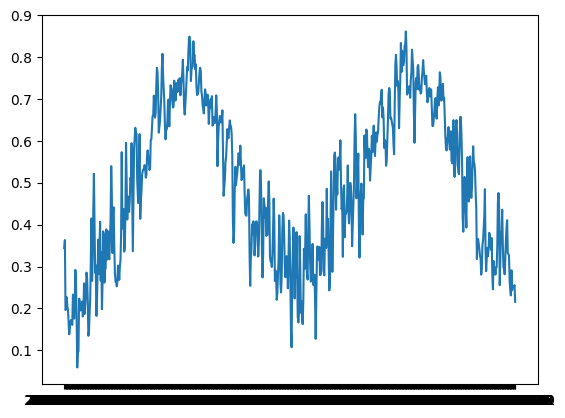

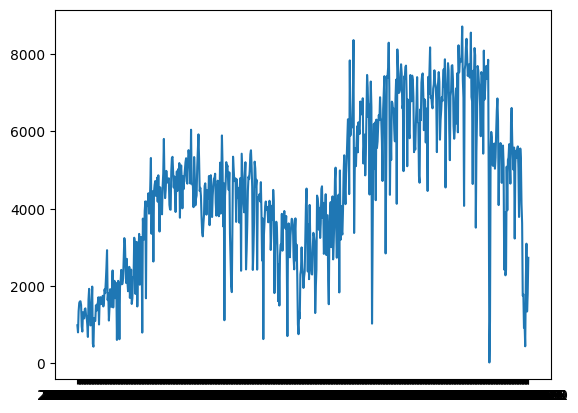

In [ ]:
plt.plot(day['dteday'], day['temp'])
plt.show()
plt.plot(day['dteday'], day['cnt'])
plt.show()


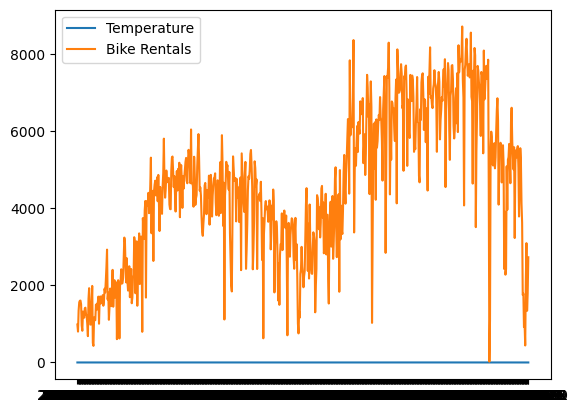

In [ ]:
plt.plot(day['dteday'], day['temp'], label="Temperature")

plt.plot(day['dteday'], day['cnt'], label="Bike Rentals")
plt.legend()
plt.show()

A scatter diagram is much better suited to illustrate the relationship between temperature and bikes rented.

Notice the upward and rightward trajectory - bike rentals are inxreasing along with density as temperature increases

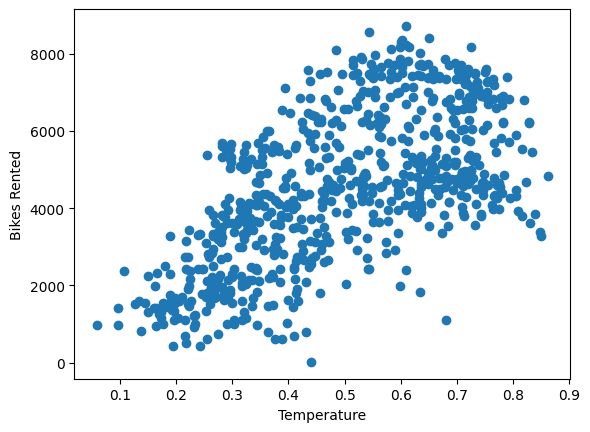

In [ ]:
plt.scatter(day['temp'], day['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

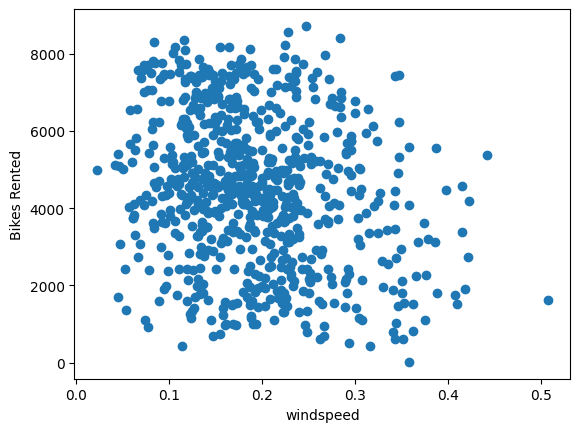

In [ ]:
plt.scatter(day['windspeed'], day['cnt'])
plt.xlabel('windspeed')
plt.ylabel('Bikes Rented')
plt.show()

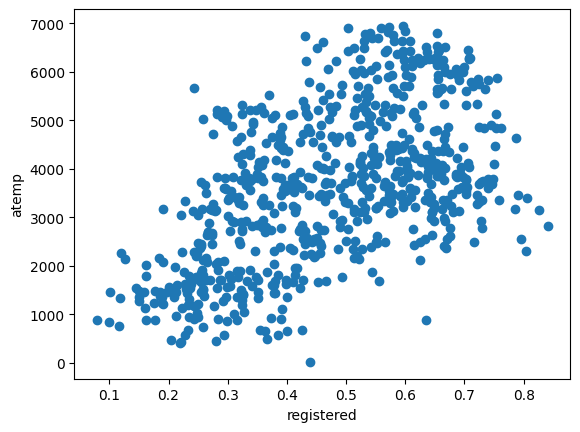

In [ ]:
plt.scatter(day['atemp'], day['registered'])
plt.ylabel('atemp')
plt.xlabel('registered')
plt.show()

corr method allows us to check correlation between columns

In [ ]:
day['temp'].corr(day['cnt'])

0.6274940090334918

In [ ]:
day['windspeed'].corr(day['cnt'])

-0.23454499742166993

In [ ]:
day.corr()

<ipython-input-32-896430dc1863>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [ ]:
day.corr()[['cnt', 'casual', 'registered']]

<ipython-input-31-678dc556f249>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()[['cnt', 'casual', 'registered']]


,cnt,casual,registered
instant,0.628830,0.275255,0.659623
season,0.406100,0.210399,0.411623
yr,0.566710,0.248546,0.594248
mnth,0.279977,0.123006,0.293488
holiday,-0.068348,0.054274,-0.108745
weekday,0.067443,0.059923,0.057367
workingday,0.061156,-0.518044,0.303907
weathersit,-0.297391,-0.247353,-0.260388
temp,0.627494,0.543285,0.540012
atemp,0.631066,0.543864,0.544192


<ipython-input-35-f0852a24633e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()[['cnt', 'casual', 'registered']]


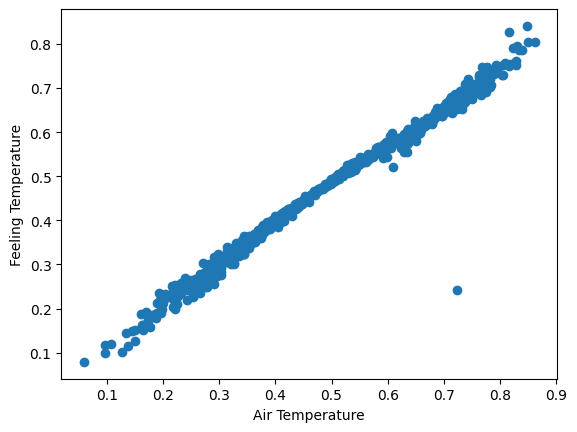

<function matplotlib.pyplot.show(close=None, block=None)>

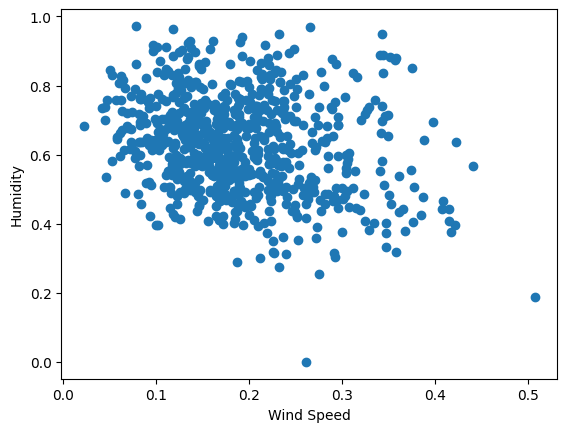

In [ ]:
day.corr()[['cnt', 'casual', 'registered']]
temp_atemp_corr = day['temp'].corr(day['atemp'])

windspeed_hum_corr = day['windspeed'].corr(day['hum'])

plt.scatter(day['temp'], day['atemp'])
plt.xlabel('Air Temperature')
plt.ylabel('Feeling Temperature')
plt.show()
            
plt.scatter(day['windspeed'], day['hum'])
plt.xlabel('Wind Speed')
plt.ylabel('Humidity')   
plt.show



In [ ]:
print(temp_atemp_corr)

print(windspeed_hum_corr)

0.9917015532294636
-0.24848909864371402


1 represents a working day in index['workingday'] 

In [ ]:
print(day['workingday'].value_counts())

day['workingday'] = day['workingday'].replace({0:1, 1:0})
print(day['workingday'].value_counts())



1    500
0    231
Name: workingday, dtype: int64
0    500
1    231
Name: workingday, dtype: int64


In [ ]:
print(day['workingday'].corr(day['casual']))
print(day['workingday'].corr(day['registered']))


0.5180441913348247
-0.30390711704591705


# Using f-strings to add text to the print statement

In [ ]:

print(f"The correlation coefficient between workingday and casual is: {day['workingday'].corr(day['casual']):.2f}")
print(f"The correlation coefficient between workingday and registered is: {day['workingday'].corr(day['registered']):.2f}")


The correlation coefficient between workingday and casual is: 0.52
The correlation coefficient between workingday and registered is: -0.30


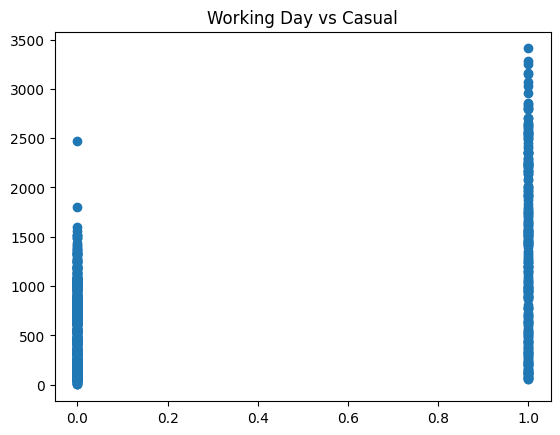

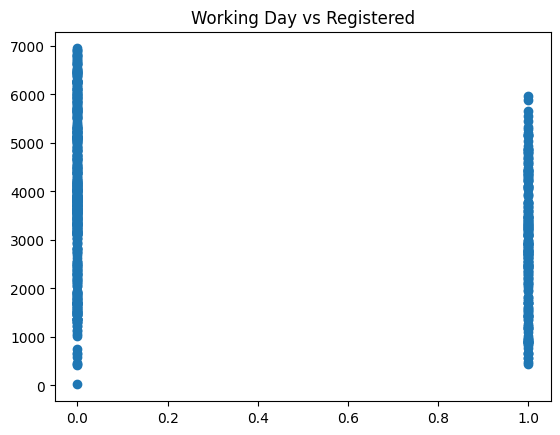

In [ ]:
plt.scatter(day['workingday'], day['casual'])
plt.title("Working Day vs Casual")
plt.show()
plt.scatter(day['workingday'], day['registered'])
plt.title("Working Day vs Registered")
plt.show()
            

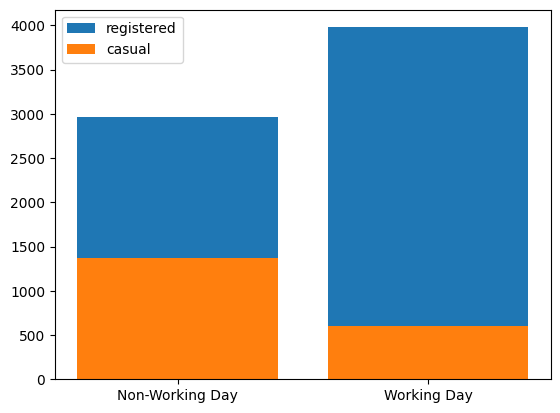

In [ ]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]
plt.bar(working_days, registered_avg, label="registered")

working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg, label="casual")
plt.legend()
plt.show()

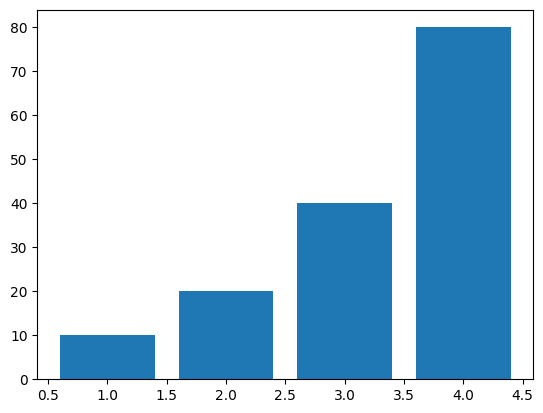

In [ ]:
plt.bar(x=[1,2,3,4], height=[10,20,40,80])
plt.show()

<ipython-input-86-6afdaba75466>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_averages = day.groupby('weekday').mean()[['casual', 'registered']].reset_index()


   weekday       casual   registered
0        0  1338.295238  2890.533333
1        1   674.133333  3663.990476
2        2   556.182692  3954.480769
3        3   551.144231  3997.394231
4        4   590.961538  4076.298077
5        5   752.288462  3938.000000
6        6  1465.257143  3085.285714
0    0
1    1
2    2
3    3
4    4
5    5
6    6
Name: weekday, dtype: int64


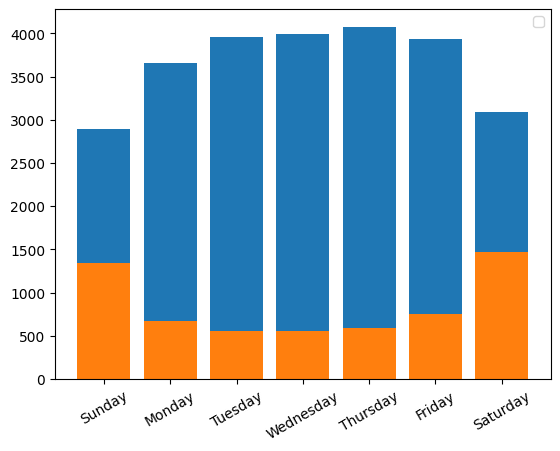

In [ ]:
weekday_averages = day.groupby('weekday').mean()[['casual', 'registered']].reset_index()
print(weekday_averages)
print(weekday_averages['weekday'])
weekday = (weekday_averages['weekday']) 
casual = (weekday_averages['casual'])
registered = (weekday_averages['registered'])

plt.legend()
plt.bar(weekday, registered, label='Registered')
plt.xticks(ticks=[0,1,2,3,4,5,6],
           labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], 
           rotation=30)
plt.bar(weekday, casual, label='Casual')
plt.show()


1: clear or few clouds
2: mist or cloudy
3: light rain, light snow, thunderstorm
4: heavy rain, snow, ice pellets, fog

Data implies it comes from a warm area where it does not snow.


In [ ]:
day['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [ ]:
day['weathersit'].unique()

array([2, 1, 3])

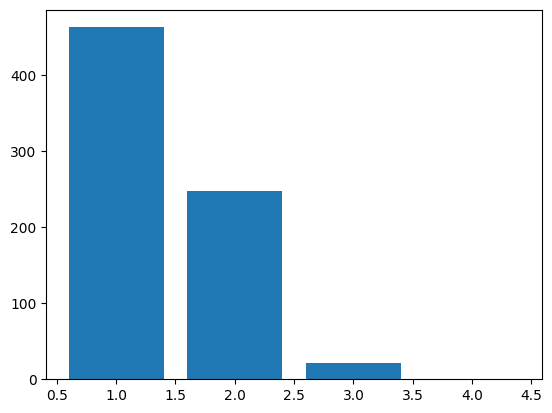

In [ ]:
weather_types = [1, 2, 3, 4]
frequencies = [463, 247, 21, 0]
plt.bar(weather_types, frequencies)
plt.show()

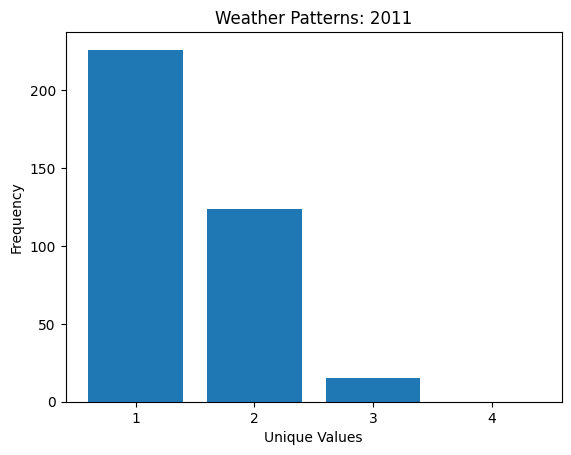

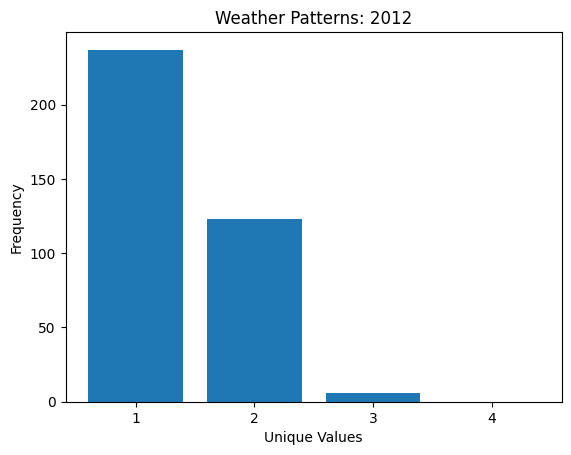

In [ ]:
unique_values = [1, 2, 3, 4]
weather_2011 = [226, 124, 15, 0]
weather_2012 = [237, 123, 6, 0]

plt.bar(unique_values, weather_2011)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2011')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()
plt.bar(unique_values, weather_2012)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns: 2012')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')

plt.show()

Using value_count method we can add bins as an argument in the parameter and split up the distribution of values by the number of bins we specify.

We can see from the dataset that the days when the numbers of rentals are under 890 is very rare, most days the amount of rentals are between 3,000 and 6,000.

In [ ]:
cntdfq = day['cnt'].value_counts(bins=10)
print(cntdfq)

(4368.0, 5237.2]    137
(3498.8, 4368.0]    122
(5237.2, 6106.4]     81
(6975.6, 7844.8]     79
(6106.4, 6975.6]     76
(2629.6, 3498.8]     73
(1760.4, 2629.6]     71
(891.2, 1760.4]      62
(7844.8, 8714.0]     17
(13.307, 891.2]      13
Name: cnt, dtype: int64


Output is descinding order iterating the most frequent bin by default, using sort_index we now sort by the values themselves in ascending order

In [ ]:
cntdfqasc = day['cnt'].value_counts(bins=10).sort_index()
print(cntdfqasc)

(13.307, 891.2]      13
(891.2, 1760.4]      62
(1760.4, 2629.6]     71
(2629.6, 3498.8]     73
(3498.8, 4368.0]    122
(4368.0, 5237.2]    137
(5237.2, 6106.4]     81
(6106.4, 6975.6]     76
(6975.6, 7844.8]     79
(7844.8, 8714.0]     17
Name: cnt, dtype: int64


In [ ]:
registered_freq = day['registered'].value_counts(bins=10).sort_index()
print(registered_freq)

(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: registered, dtype: int64


In [ ]:
casual_freq = day['casual'].value_counts(bins=10).sort_index()
print(casual_freq)

(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: casual, dtype: int64


Histogram is the best way to visualize a grouped frequency table

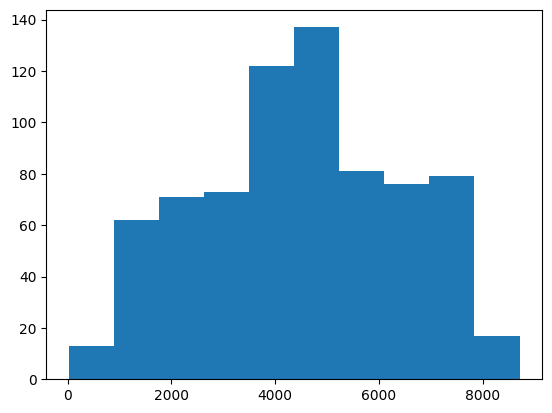

In [ ]:
plt.hist(day['cnt'])
plt.show()

You don't want to histogram something you already binned as the histogram determines intervals based on frequency 

In [ ]:
plt.hist(casual_freq)
plt.show()

(array([204., 144., 165.,  89.,  44.,  23.,  26.,  22.,   9.,   5.]),
 array([2.0000e+00, 3.4280e+02, 6.8360e+02, 1.0244e+03, 1.3652e+03,
        1.7060e+03, 2.0468e+03, 2.3876e+03, 2.7284e+03, 3.0692e+03,
        3.4100e+03]),
 <BarContainer object of 10 artists>)

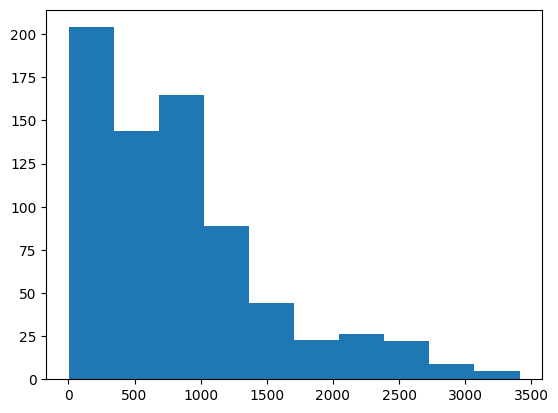

In [ ]:
plt.hist(day['casual'])